<a href="https://colab.research.google.com/github/JLDaniel77/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS3_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

![Baye's Theorem with Labels](https://www.probabilisticworld.com/wp-content/uploads/2016/06/bayes-theorem-with-description-2.png)

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Derive Baye's Rule

\begin{align}
P(A|B) &= \frac{P(A \cap B)}{P(B)}\\
\Rightarrow P(A|B)P(B) &= P(A \cap B)\\
P(B|A) &= \frac{P(B \cap A)}{P(A)}\\
\Rightarrow P(B|A)P(A) &= P(B \cap A)\\
\Rightarrow P(A|B)P(B) &= P(B|A)P(A) \\
P(A \cap B) &= P(B \cap A)\\
P(A|B) &= \frac{P(B|A) \times P(A)}{P(B)}
\end{align}

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [73]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

from scipy import stats
import numpy as np

np.random.seed(seed=42)

coinflips = np.random.binomial(n=1, p=.5, size=100)
print(coinflips)

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0]


In [0]:
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)

In [75]:
confidence_interval(coinflips)

(0.47, 0.3704689875017368, 0.5695310124982632)

In [76]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [77]:
#0.37046898750173674
#0.3704689875017368

stats.bayes_mvs(coinflips, alpha=.95)

(Mean(statistic=0.47, minmax=(0.37046898750173674, 0.5695310124982632)),
 Variance(statistic=0.25680412371134015, minmax=(0.1939698977025208, 0.3395533426586547)),
 Std_dev(statistic=0.5054540733507159, minmax=(0.44042013771229943, 0.5827120581030176)))

In [78]:
coinflips_mean_dist, _, _ = stats.mvsdist(coinflips)
coinflips_mean_dist

In [79]:
help(coinflips_mean_dist)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (

In [80]:
coinflips_mean_dist.rvs(100)

array([0.47447628, 0.51541425, 0.54722018, 0.4589882 , 0.51501386,
       0.53819192, 0.43382292, 0.53546659, 0.47026173, 0.44967562,
       0.4621107 , 0.42691904, 0.37324325, 0.47531437, 0.46052277,
       0.48711257, 0.52456771, 0.43332181, 0.49545882, 0.44671454,
       0.47520117, 0.47047251, 0.41828918, 0.50159477, 0.42965501,
       0.45273383, 0.48045849, 0.45342529, 0.48238344, 0.53966291,
       0.48230241, 0.48073422, 0.48553525, 0.47962228, 0.41274185,
       0.42892633, 0.5170948 , 0.42678096, 0.42249309, 0.51499109,
       0.47059199, 0.39903942, 0.41790336, 0.46406817, 0.42232382,
       0.42163269, 0.47848227, 0.48232842, 0.4731858 , 0.51077244,
       0.3957508 , 0.48504646, 0.49014295, 0.53252732, 0.45495376,
       0.47883978, 0.60393033, 0.4492549 , 0.44797902, 0.54782121,
       0.43380002, 0.5760073 , 0.36941266, 0.44467418, 0.4939245 ,
       0.45278835, 0.55635162, 0.48695459, 0.39080983, 0.45948606,
       0.2941779 , 0.35950718, 0.44805696, 0.4725126 , 0.42218

In [81]:
import pandas as pd
pd.DataFrame(coinflips).describe()

,0
count,100.000000
mean,0.470000
std,0.501614
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

## Problem 1

In [83]:
def prob_drunk_given_positive(prob_positive_drunk, prob_drunk_prior, prob_positive):
  test1 = (prob_positive_drunk * prob_drunk_prior) / prob_positive
  test2 = (prob_positive_drunk * prob_drunk_prior) / (prob_positive)**2 
  result1 = 'Probability a person is drunk, given one failed breathalyzer test:', test1
  result2 = 'Probability a person is drunk, given two failed breathalyzer tests:', test2
  return result1, result2

prob_drunk_given_positive(1, 0.001, 0.08)

(('Probability a person is drunk, given one failed breathalyzer test:',
  0.0125),
 ('Probability a person is drunk, given two failed breathalyzer tests:',
  0.15625))

## Problem 2

In [84]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
columns = ['class_name', 'handicapped_infants', 'water_project_cost_sharing', 'adoption_of_the_budget_resolution',
          'physician_fee_freeze', 'el_salvador_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban',
          'aid_to_nicaraguan_contras', 'mx_missile', 'immigration', 'synfuels_corporation_cutback',
          'education_spending', 'superfund_right_to_sue', 'crime', 'duty_free_exports',
          'export_administration_act_south_africa']

df = pd.read_csv(url, header=None, names=columns, na_values='?').set_index('class_name')
df.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
class_name,,,,,,,,,,,,,,,,
republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
# Removed nan values because bayes_mvs doesn't have an omit param
df = df.dropna()

In [0]:
df = df.replace({'y': 1, 'n': 0})

In [0]:
rep = df.loc['republican']
dem = df.loc['democrat']

In [88]:
rep.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
class_name,,,,,,,,,,,,,,,,
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
republican,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0


In [89]:
dem.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
class_name,,,,,,,,,,,,,,,,
democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1


In [0]:
def confidence_interval(data, confidence=0.95):
  '''
  Calculate a confidence interval around a sample mean for given data.
  using t-distribution and two tailed test, default 95% confidence.
  
  Arguments:
  data = iterable (list or np array) of sample observations
  confidence - level of confidence for interval
  '''
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  '''
  Return a string with a pretty report of a confidence interval
  
  Arguments:
    confidence_interval - a tuple of (mean, lower bount, upper bound)
    
   Returns:
    None, but prints to screen the report
    '''
#   print('Mean: {}'.format(confidence_interval[0]))
#   print('Lower bound: {}'.format(confidence_interval[1]))
#   print('Upper bound: {}'.format(confidence_interval[2]))
  s = 'our mean lies in the interval [{:.2}, {:.2}]'.format(
    confidence_interval[1], confidence_interval[2])
  return s

In [91]:
stats.bayes_mvs(rep['handicapped_infants'], alpha=0.95)

(Mean(statistic=0.21296296296296297, minmax=(0.13450349074958223, 0.2914224351763437)),
 Variance(statistic=0.1723985890652557, minmax=(0.13163384272877396, 0.22552107883595443)),
 Std_dev(statistic=0.4142216885759803, minmax=(0.3628137851967231, 0.4748905967019713)))

In [92]:
confidence_interval(rep['handicapped_infants'])

(0.21296296296296297, 0.13450349074958223, 0.2914224351763437)

In [93]:
rep.describe().T

,count,mean,std,min,25%,50%,75%,max
handicapped_infants,108.0,0.212963,0.411310,0.0,0.0,0.0,0.0,1.0
water_project_cost_sharing,108.0,0.472222,0.501555,0.0,0.0,0.0,1.0,1.0
adoption_of_the_budget_resolution,108.0,0.157407,0.365882,0.0,0.0,0.0,0.0,1.0
physician_fee_freeze,108.0,0.990741,0.096225,0.0,1.0,1.0,1.0,1.0
el_salvador_aid,108.0,0.953704,0.211106,0.0,1.0,1.0,1.0,1.0
religious_groups_in_schools,108.0,0.870370,0.337461,0.0,1.0,1.0,1.0,1.0
anti_satellite_test_ban,108.0,0.268519,0.445255,0.0,0.0,0.0,1.0,1.0
aid_to_nicaraguan_contras,108.0,0.148148,0.356903,0.0,0.0,0.0,0.0,1.0
mx_missile,108.0,0.138889,0.347443,0.0,0.0,0.0,0.0,1.0
immigration,108.0,0.574074,0.496788,0.0,0.0,1.0,1.0,1.0


In [94]:
stats.bayes_mvs(dem['handicapped_infants'], alpha=0.95)

(Mean(statistic=0.5887096774193549, minmax=(0.5008854514528095, 0.6765339033859002)),
 Variance(statistic=0.24813383097840572, minmax=(0.1929709352919263, 0.3187452362753357)),
 Std_dev(statistic=0.4971022146015008, minmax=(0.4392845721077925, 0.5645752706905747)))

## Tuple unpacking: this will allow me to add the bayesian mean, upper bound, and lower bound to the comparison table for problem 3.

In [0]:
a, b, c = stats.bayes_mvs(dem['handicapped_infants'], alpha=0.95)

In [96]:
print(a)
print(b)
print(c)

Mean(statistic=0.5887096774193549, minmax=(0.5008854514528095, 0.6765339033859002))
Variance(statistic=0.24813383097840572, minmax=(0.1929709352919263, 0.3187452362753357))
Std_dev(statistic=0.4971022146015008, minmax=(0.4392845721077925, 0.5645752706905747))


In [0]:
d, e = a

In [98]:
print(d)
print(e)

0.5887096774193549
(0.5008854514528095, 0.6765339033859002)


In [99]:
f,g = e
print(f)
print(g)

0.5008854514528095
0.6765339033859002


In [100]:
stats.ttest_1samp(dem['handicapped_infants'], 0.588710)

Ttest_1sampResult(statistic=-7.270529297663421e-06, pvalue=0.9999942107355586)

In [101]:
confidence_interval(dem['handicapped_infants'])

(0.5887096774193549, 0.5008854514528094, 0.6765339033859004)

In [102]:
dem.describe().T

,count,mean,std,min,25%,50%,75%,max
handicapped_infants,124.0,0.588710,0.494064,0.0,0.0,1.0,1.0,1.0
water_project_cost_sharing,124.0,0.451613,0.499672,0.0,0.0,0.0,1.0,1.0
adoption_of_the_budget_resolution,124.0,0.854839,0.353692,0.0,1.0,1.0,1.0,1.0
physician_fee_freeze,124.0,0.048387,0.215453,0.0,0.0,0.0,0.0,1.0
el_salvador_aid,124.0,0.201613,0.402832,0.0,0.0,0.0,0.0,1.0
religious_groups_in_schools,124.0,0.443548,0.498818,0.0,0.0,0.0,1.0,1.0
anti_satellite_test_ban,124.0,0.766129,0.425008,0.0,1.0,1.0,1.0,1.0
aid_to_nicaraguan_contras,124.0,0.830645,0.376587,0.0,1.0,1.0,1.0,1.0
mx_missile,124.0,0.790323,0.408730,0.0,1.0,1.0,1.0,1.0
immigration,124.0,0.532258,0.500983,0.0,0.0,1.0,1.0,1.0


## Problem 3

In [103]:
table = pd.DataFrame()

def comparison_table(rep_df, dem_df):
  confidence = 0.95
  for issue in rep_df.describe():
    table.loc[issue, 'dem_mean'] = dem_df[issue].mean()
    table.loc[issue, 'rep_mean'] = rep_df[issue].mean()
    table.loc[issue, 'dem_interval'] = stats.sem(dem_df[issue])*stats.t.ppf((1+confidence)/2, dem_df[issue].size-1)
    table.loc[issue, 'rep_interval'] = stats.sem(rep_df[issue])*stats.t.ppf((1+confidence)/2, rep_df[issue].size-1)
    table.loc[issue, 'dem_ub_ci'] = table.loc[issue, 'dem_mean'] + table.loc[issue, 'dem_interval']
    table.loc[issue, 'rep_ub_ci'] = table.loc[issue, 'rep_mean'] + table.loc[issue, 'rep_interval']
    table.loc[issue, 'dem_lb_ci'] = table.loc[issue, 'dem_mean'] - table.loc[issue, 'dem_interval']
    table.loc[issue, 'rep_lb_ci'] = table.loc[issue, 'rep_mean'] - table.loc[issue, 'rep_interval']
    dem_bayes = stats.bayes_mvs(dem_df[issue], alpha=0.95)
    dem_a, dem_b, dem_c = dem_bayes
    dem_d, dem_e = dem_a
    dem_f, dem_g = dem_e
    table.loc[issue, 'dem_bayes_mean'] = dem_d
    table.loc[issue, 'dem_bayes_ub'] = dem_g
    table.loc[issue, 'dem_bayes_lb'] = dem_f
    rep_bayes = stats.bayes_mvs(rep_df[issue], alpha=0.95)
    rep_a, rep_b, rep_c = rep_bayes
    rep_d, rep_e = rep_a
    rep_f, rep_g = rep_e
    table.loc[issue, 'rep_bayes_mean'] = rep_d
    table.loc[issue, 'rep_bayes_ub'] = rep_g
    table.loc[issue, 'rep_bayes_lb'] = rep_f
  return table

comparison_table(rep, dem)

,dem_mean,rep_mean,dem_interval,rep_interval,dem_ub_ci,rep_ub_ci,dem_lb_ci,rep_lb_ci,dem_bayes_mean,dem_bayes_ub,dem_bayes_lb,rep_bayes_mean,rep_bayes_ub,rep_bayes_lb
handicapped_infants,0.588710,0.212963,0.087824,0.078459,0.676534,0.291422,0.500885,0.134503,0.588710,0.676534,0.500885,0.212963,0.291422,0.134503
water_project_cost_sharing,0.451613,0.472222,0.088821,0.095674,0.540434,0.567896,0.362792,0.376548,0.451613,0.540434,0.362792,0.472222,0.567896,0.376548
adoption_of_the_budget_resolution,0.854839,0.157407,0.062872,0.069794,0.917711,0.227201,0.791967,0.087614,0.854839,0.917711,0.791967,0.157407,0.227201,0.087614
physician_fee_freeze,0.048387,0.990741,0.038299,0.018355,0.086686,1.009096,0.010088,0.972385,0.048387,0.086686,0.010088,0.990741,1.009096,0.972385
el_salvador_aid,0.201613,0.953704,0.071607,0.040269,0.273220,0.993973,0.130006,0.913434,0.201613,0.273220,0.130006,0.953704,0.993973,0.913434
religious_groups_in_schools,0.443548,0.870370,0.088669,0.064372,0.532218,0.934743,0.354879,0.805998,0.443548,0.532218,0.354879,0.870370,0.934743,0.805998
anti_satellite_test_ban,0.766129,0.268519,0.075549,0.084935,0.841678,0.353453,0.690580,0.183584,0.766129,0.841678,0.690580,0.268519,0.353453,0.183584
aid_to_nicaraguan_contras,0.830645,0.148148,0.066942,0.068081,0.897587,0.216229,0.763704,0.080067,0.830645,0.897587,0.763704,0.148148,0.216229,0.080067
mx_missile,0.790323,0.138889,0.072655,0.066276,0.862978,0.205165,0.717667,0.072612,0.790323,0.862978,0.717667,0.138889,0.205165,0.072612
immigration,0.532258,0.574074,0.089054,0.094765,0.621312,0.668839,0.443204,0.479309,0.532258,0.621312,0.443204,0.574074,0.668839,0.479309


In [104]:
table = table.reset_index()
table.head()

,index,dem_mean,rep_mean,dem_interval,rep_interval,dem_ub_ci,rep_ub_ci,dem_lb_ci,rep_lb_ci,dem_bayes_mean,dem_bayes_ub,dem_bayes_lb,rep_bayes_mean,rep_bayes_ub,rep_bayes_lb
0,handicapped_infants,0.588710,0.212963,0.087824,0.078459,0.676534,0.291422,0.500885,0.134503,0.588710,0.676534,0.500885,0.212963,0.291422,0.134503
1,water_project_cost_sharing,0.451613,0.472222,0.088821,0.095674,0.540434,0.567896,0.362792,0.376548,0.451613,0.540434,0.362792,0.472222,0.567896,0.376548
2,adoption_of_the_budget_resolution,0.854839,0.157407,0.062872,0.069794,0.917711,0.227201,0.791967,0.087614,0.854839,0.917711,0.791967,0.157407,0.227201,0.087614
3,physician_fee_freeze,0.048387,0.990741,0.038299,0.018355,0.086686,1.009096,0.010088,0.972385,0.048387,0.086686,0.010088,0.990741,1.009096,0.972385
4,el_salvador_aid,0.201613,0.953704,0.071607,0.040269,0.273220,0.993973,0.130006,0.913434,0.201613,0.273220,0.130006,0.953704,0.993973,0.913434


In [0]:
rep_viz = table[['index', 'rep_mean', 'rep_lb_ci', 'rep_ub_ci', 'rep_bayes_mean', 'rep_bayes_lb', 'rep_bayes_ub']]
dem_viz = table[['index', 'dem_mean', 'dem_lb_ci', 'dem_ub_ci', 'dem_bayes_mean', 'dem_bayes_lb', 'dem_bayes_ub']]

Text(0, 0.5, 'Average of Votes')

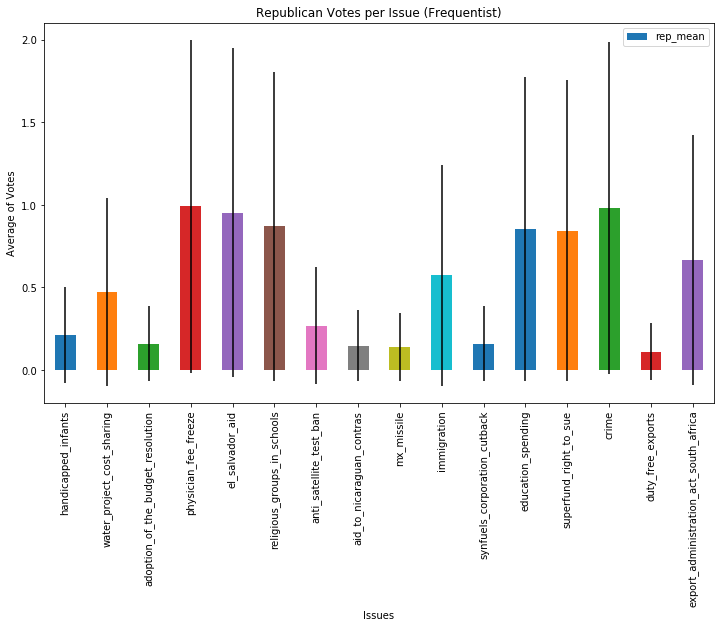

In [119]:
rep_viz.plot(x='index', y='rep_mean', yerr= 'rep_ub_ci', kind='bar', figsize=(12, 7));
plt.title('Republican Votes per Issue (Frequentist)')
plt.xlabel('Issues')
plt.ylabel('Average of Votes')

Text(0, 0.5, 'Average of Votes')

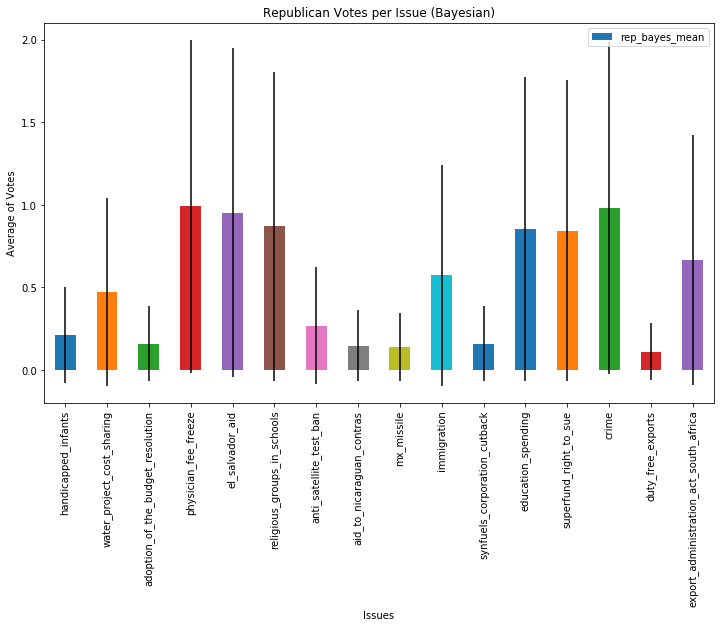

In [121]:
rep_viz.plot(x='index', y='rep_bayes_mean', yerr='rep_bayes_ub', kind='bar', figsize=(12, 7));
plt.title('Republican Votes per Issue (Bayesian)')
plt.xlabel('Issues')
plt.ylabel('Average of Votes')

## Problem 4

The results from the frequentist approach and the Bayesian approach were very similar, but had slight differences. Those differences could be enough to make the frequentist approach less reliable, depending on the data set. For data sets that require high precision, you should use the Baeysian approach.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)